In [1]:
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [88]:
import numpy as np
import pandas as pd
trial_types = list(master_log['Stim/Block/Response'].unique())
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)

#Sub-DataFrame for Cl4 & Dictionary for session and numbers for specific trial types
session = {}
for i in range(0, len(mouse_uni)):
    for j in range(0, len(date_uni)):
        sub = master_log[(master_log.mouse_name == mouse_uni[i][0]) & (master_log.date == date_uni[j][0])]
        if (sub.empty == False):
            session[str(mouse_uni[i][0])+','+str(date_uni[j][0])] = [len(sub[(sub['Stim/Block/Response'] == trial_types[0]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[1]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[2]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[3]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[4]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[5]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[6]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])]),
                                                                     len(sub[(sub['Stim/Block/Response'] == trial_types[7]) & (sub.cluster_name == sub.cluster_name[sub.cluster_name.index[0]][0])])]


In [319]:
#Create a dictionary with trial types and ratios
session_ratio = {}
for i in session:
    if sum(session[i][0:4]) != 0 or sum(session[i][4:8]) != 0:
        session_ratio[i] = [session[i][0]/sum(session[i][0:4]),
                      session[i][1]/sum(session[i][0:4]),
                      session[i][2]/sum(session[i][0:4]),
                      session[i][3]/sum(session[i][0:4]),
                      session[i][4]/sum(session[i][4:8]),
                      session[i][5]/sum(session[i][4:8]),
                      session[i][6]/sum(session[i][4:8]),
                      session[i][7]/sum(session[i][4:8])]
#Create a list that contains the mean ratios of each trial type
means = []
for count in range(0, len(trial_types)):
    temp = []
    for i in session_ratio:
        temp.append(session_ratio[i][count])
    means.append(np.mean(temp))
#Create a list that contains the standard errors of each trial type
err = []
for count in range(0, len(trial_types)):
    temp = []
    for i in session_ratio:
        temp.append(session_ratio[i][count])
    err.append(np.std(temp))

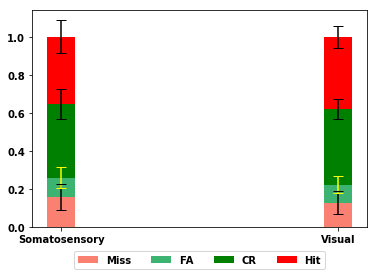

In [320]:
#Create bar-plots corresponding to the means of trial types
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
rc('font',weight='bold')
bars1 = [means[0], means[4]]
err1 = [err[0], err[4]]
bars2 = [means[1], means[7]]
err2 = [err[1], err[7]]
bars3 = [means[2], means[5]]
err3 = [err[2], err[5]]
bars4 = [means[3], means[6]]
err4 = [err[3], err[6]]
bars12 = np.add(bars1, bars2).tolist()
bars123 = np.add(bars12, bars3).tolist()
pos = ['Somatosensory','Visual']
barWidth = 0.1
p1 = plt.bar(pos, bars1, width=barWidth, color='salmon', yerr=err1, capsize=5, ecolor='black')
p2 = plt.bar(pos, bars2, bottom=bars1, width=barWidth, color='mediumseagreen', yerr=err2, capsize=5, ecolor='yellow')
p3 = plt.bar(pos, bars3, bottom=bars12, width=barWidth, color='green', yerr=err3, capsize=5)
p4 = plt.bar(pos, bars4, bottom=bars123, width=barWidth, color='red', yerr=err4, capsize=5)
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Miss','FA','CR','Hit'),ncol=4,bbox_to_anchor=(0.5,-0.15),loc='center')